# NLP Assignment: Fake News Detection

Nowadays there are a lot of news being spread around the internet, however, not all of them are real, hence it is imperative for us to be able to differentiate the real news from the fake news. Especially with the availability of social media and phones, it is easy to misinterpret fake news as a real one.

In [26]:
import pandas as pd
import numpy as np
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics 

fake_news = pd.read_csv('Fake.csv')
true_news = pd.read_csv('True.csv')

### Fake news data

In [27]:
print("Fake News:")
fake_news

Fake News:


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


### True news data

In [28]:
print("True News:")
true_news

True News:


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


Replace "politicsNews" with "Politics" to make it more understandable and "News" to "Others" to standardise them

In [29]:
fake_news['subject'] = fake_news['subject'].replace('News', 'Others')
fake_news

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,Others,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,Others,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",Others,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",Others,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,Others,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [30]:
true_news['subject'] = true_news['subject'].str.replace('politicsNews', 'Politics')
true_news

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,Politics,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,Politics,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,Politics,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,Politics,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,Politics,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


Removing all the Reuters - in the first few words


In [31]:
def remove_prefix(text):
    if "(Reuters) -" in text:
        return text.split("(Reuters) -", 1)[-1]
    else:
        return text

# Apply the function to the 'text' column
true_news['text'] = true_news['text'].apply(remove_prefix)

### Visualizing the imbalance within the dataset

In [32]:
import plotly.graph_objects as go

fake_news_count = len(fake_news)
true_news_count = len(true_news)

fig = go.Figure(data=[
    go.Bar(x=['Fake news count', 'True data count'], y=[fake_news_count, true_news_count])
])

fig.update_layout(
    title='Count of Fake News vs. True News',
    xaxis_title='Dataset',
    yaxis_title='Count',
)
fig.show()

## Check for any null values

In [33]:
print("Fake News dataset null values:")
fake_news.isnull().sum()

Fake News dataset null values:


title      0
text       0
subject    0
date       0
dtype: int64

In [34]:
print("True News dataset null values:")
true_news.isnull().sum()

True News dataset null values:


title      0
text       0
subject    0
date       0
dtype: int64

No null values were found in both csv files

## Drop any duplicates with drop_duplicates

In [35]:
fake_news.drop_duplicates(subset=['title', 'text'], inplace=True)
fake_news

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,Others,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,Others,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",Others,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",Others,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,Others,"December 25, 2017"
...,...,...,...,...
22698,The White House and The Theatrics of ‘Gun Cont...,21st Century Wire says All the world s a stage...,US_News,"January 7, 2016"
22699,Activists or Terrorists? How Media Controls an...,Randy Johnson 21st Century WireThe majority ...,US_News,"January 7, 2016"
22700,"BOILER ROOM – No Surrender, No Retreat, Heads ...",Tune in to the Alternate Current Radio Network...,US_News,"January 6, 2016"
22701,Federal Showdown Looms in Oregon After BLM Abu...,21st Century Wire says A new front has just op...,US_News,"January 4, 2016"


In [36]:
true_news.drop_duplicates(subset=['title', 'text'], inplace=True)
true_news

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction...,Politics,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fi...,Politics,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links be...,Politics,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos to...,Politics,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Pos...,Politics,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Don...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory a...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet-era factories...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Pa...,worldnews,"August 22, 2017"


### After removing duplicates and checking for null values, there is an imbalance in the number of data between fake news and true news.

In [37]:
fake_news_count = len(fake_news)
true_news_count = len(true_news)

fig = go.Figure(data=[
    go.Bar(x=['Fake news count', 'True news count'], y=[fake_news_count, true_news_count])
])

title = round(len(true_news) / len(fake_news), 1)
difference = len(true_news) - len(fake_news)

fig.update_layout(
    title={
        'text': f'True news outnumbered fake news by {title} times.<br>True news outnumbering fake news by {difference} news articles',
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis_title='Dataset',
    yaxis_title='Count',
)
fig.show()

### Data scraped from a fake news website

In [38]:
dataOnion = pd.read_excel('newsOnion.xlsx')
dataOnion = dataOnion.drop(['PageLink'], axis=1)
dataOnion.rename(columns = {'Author':'subject', 'Article':'text', 'Date':'date', 'Title':'title'}, inplace = True)
dataOnion['subject'] = dataOnion['subject'].replace('Anonymous', 'Others')
dataOnion

,title,subject,text,date
0,The Onion | America's Finest News Source.,Others,Following the 92-year-old’s announcement that ...,2023-09-24 17:06:04.221
1,Republican Presidential Candidates Undergo Man...,Politics,MILWAUKEE—Lining up in the hallway dressed in ...,2023-10-04 00:54:08.316
2,What To Expect From The First GOP Debate,Politics,The first debate of the 2024 election cycle is...,2023-10-04 00:54:08.316
3,Best Strategies From Ron DeSantis’ Leaked Deba...,Politics,A leaked memo from the Never Back Down super P...,2023-10-04 00:54:08.316
4,Trump Supporters Explain Why They Doxxed Grand...,Politics,After former President Donald Trump was indict...,2023-10-04 00:54:08.316
...,...,...,...,...
5323,"Technicians Repair Dole's Circuits, Human-like...",Politics,NaN,2023-10-04 00:54:08.316
5324,Clinton Tagged by Local Gang,Politics,"WASHINGTON, D.C.—In an incident under heavy in...",2023-10-04 00:54:08.316
5325,New Government Shutdown Caused by Bat in Capitol,Politics,The federal government shut down again on Mond...,2023-10-04 00:54:08.316
5326,Native Americans Ask Very Nicely For Country Back,Politics,A delegation representing a broad range of Nat...,2023-10-04 00:54:08.316


### Combine fake_news with dataOnion

In [39]:
fake_news = pd.concat([fake_news, dataOnion], ignore_index=True)
fake_news

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,Others,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,Others,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",Others,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",Others,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,Others,"December 25, 2017"
...,...,...,...,...
23231,"Technicians Repair Dole's Circuits, Human-like...",NaN,Politics,2023-10-04 00:54:08.316000
23232,Clinton Tagged by Local Gang,"WASHINGTON, D.C.—In an incident under heavy in...",Politics,2023-10-04 00:54:08.316000
23233,New Government Shutdown Caused by Bat in Capitol,The federal government shut down again on Mond...,Politics,2023-10-04 00:54:08.316000
23234,Native Americans Ask Very Nicely For Country Back,A delegation representing a broad range of Nat...,Politics,2023-10-04 00:54:08.316000


### Visualizing the difference after combination, as we can see the gap is reduced to around 2 thousand news from more than 3.2 thousand news

In [40]:
fake_news_count = len(fake_news)
true_news_count = len(true_news)

fig = go.Figure(data=[
    go.Bar(x=['Fake news count', 'True news count'], y=[fake_news_count, true_news_count])
])

title = round(len(fake_news) / len(true_news), 2)
difference = len(fake_news) - len(true_news)

fig.update_layout(
    title={
        'text': f'Fake news outnumbered true news by {title} times.<br>Fake news outnumbering true news by {difference} news articles',
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis_title='Dataset',
    yaxis_title='Count',
)
fig.show()

## Finished data preprocessing, proceed to turn the dataframes into csv files

In [41]:
fake_news.to_csv("fake_news_csv", index=False)
true_news.to_csv("true_news_csv", index=False)

### Finding the frequently used words in the dataset

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

custom_stopwords = stopwords.words('english')
custom_stopwords.extend(["com", "however", "yet", "used", "know", "could", "reuters", "one", "said", "u", "say", "also", "even", "get", "think", "what", "like", "Getty Image", "would"])

def generate_wordcloud(dataframe):
    dataframe['combined_text'] = dataframe['title'] + " " + dataframe['text']
    dataframe['combined_text'] = dataframe['combined_text'].astype(str)
    wordcloud = WordCloud(width=800, height=800,
                          background_color='white',
                          stopwords=custom_stopwords,
                          min_font_size=10).generate(" ".join(dataframe['combined_text']))

    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nichdylan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Function to show most used words

In [43]:
from sklearn.feature_extraction.text import CountVectorizer 

def get_top_words(dataframe, title): 
    dataframe['combined_text'] = dataframe['title'] + " " + dataframe['text']
    dataframe['combined_text'] = dataframe['combined_text'].astype(str) 
    dataframe = dataframe['combined_text']

    vec = CountVectorizer().fit(dataframe) 
    bag_of_words = vec.transform(dataframe) 
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                for word, idx in vec.vocabulary_.items()] 
    words_freq = sorted(words_freq, key=lambda x: x[1], 
                        reverse=True) 

    top_words = [(word, freq) for word, freq in words_freq if word not in custom_stopwords][:20]

    temp_df = pd.DataFrame(top_words, columns=['Review', 'count']) 

    if title == 'true':
        chart_title = "Top Words in True News"
    else:
        chart_title = "Top Words in Fake News"

    temp_df.groupby('Review').sum()['count'].sort_values(ascending=False).plot( 
        kind='bar', 
        figsize=(10, 6), 
        xlabel="Top Words", 
        ylabel="Count", 
        title=chart_title
    )

### Get the most used words from both fake and true news dataset

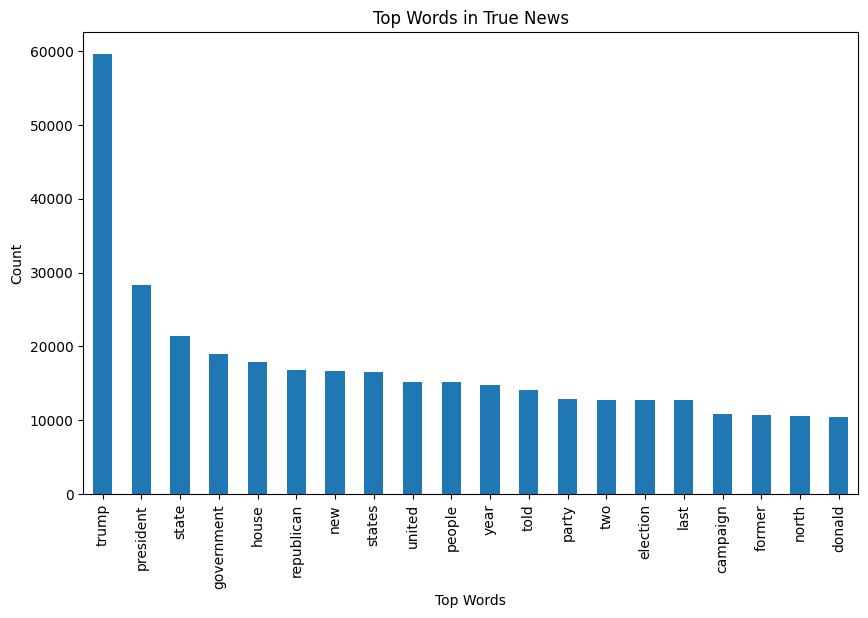

In [44]:
get_top_words(true_news, "true")
true_news.drop(columns=['combined_text'], inplace=True)

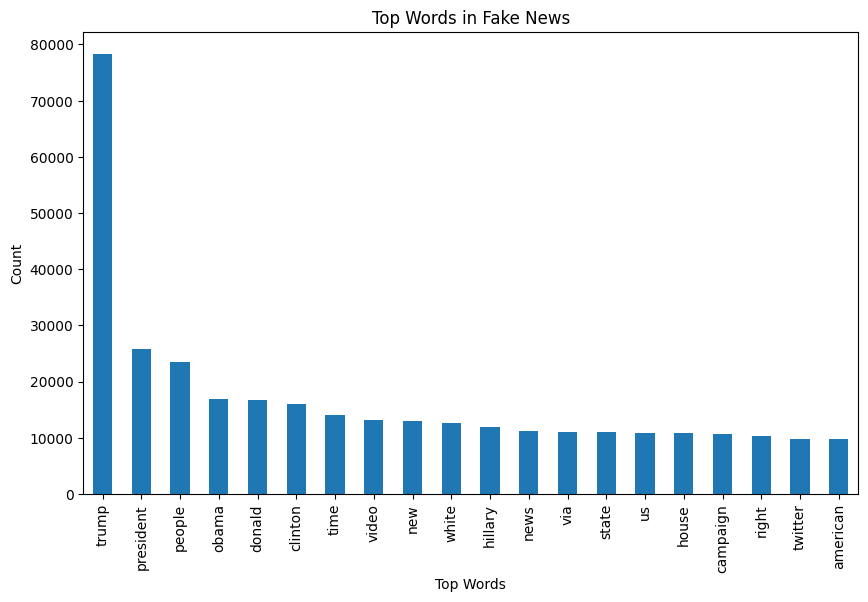

In [45]:
get_top_words(fake_news, "fake")
fake_news.drop(columns=['combined_text'], inplace=True)

As we can see the frequently used words are refeering to Donald Trump, the 45th president of the United States who served from 2017 to 2021. Overall, the predominant theme revolves around the political landscape of the United States.

### Combine both fake_news and true_news to make a complete data. Status 0 = real news, 1 = fake news

In [46]:
fake_news['status'] = 1
true_news['status'] = 0
data = pd.concat([true_news, fake_news], ignore_index=True)
data

,title,text,subject,date,status
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction...,Politics,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fi...,Politics,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links be...,Politics,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos to...,Politics,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Pos...,Politics,"December 29, 2017",0
...,...,...,...,...,...
44428,"Technicians Repair Dole's Circuits, Human-like...",NaN,Politics,2023-10-04 00:54:08.316000,1
44429,Clinton Tagged by Local Gang,"WASHINGTON, D.C.—In an incident under heavy in...",Politics,2023-10-04 00:54:08.316000,1
44430,New Government Shutdown Caused by Bat in Capitol,The federal government shut down again on Mond...,Politics,2023-10-04 00:54:08.316000,1
44431,Native Americans Ask Very Nicely For Country Back,A delegation representing a broad range of Nat...,Politics,2023-10-04 00:54:08.316000,1


### Randomizing the ordering of the data

In [47]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
data

,title,text,subject,date,status
0,Trump to target Obama's climate initiatives: W...,Donald Trump’s administration is committed to...,Politics,"January 20, 2017",0
1,Trump Campaign Denies Doctoring Photos Showing...,NaN,Politics,2023-10-04 00:54:08.316000,1
2,"A month on, U.S., Niger still disagree on what...",A month after an Islamist ambush in Niger kil...,worldnews,"November 3, 2017",0
3,Trump Spokeswoman HUMILIATES Herself While Tr...,Trump spokeswoman and walking stump Katrina Pi...,Others,"January 10, 2017",1
4,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,politics,"Mar 31, 2015",1
...,...,...,...,...,...
44428,Germany's Schaeuble warns Trump over protectio...,German Finance Minister Wolfgang Schaeuble ha...,Politics,"January 16, 2017",0
44429,U.S. sanctions two North Korean officials over...,The United States on Tuesday announced sancti...,worldnews,"December 26, 2017",0
44430,JUDGE REMOVES 1 YR OLD FROM HOME OF MARRIED LE...,Gay Mafia descends in 5 4 3 2 1 Given the curr...,left-news,"Nov 13, 2015",1
44431,U.S. tax plan threatens Wall Street's Bermuda ...,U.S. money managers with reinsurance companie...,Politics,"November 2, 2017",0


### Making the function for stemming the text with porter stemmer

In [48]:
lemmatizer = WordNetLemmatizer()

def lemmatization(content):
    lemmatizer = WordNetLemmatizer()
    lemmatized_content = re.sub('[^a-zA-Z]', ' ', content)
    lemmatized_content = lemmatized_content.lower()
    tokens = word_tokenize(lemmatized_content)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens if not word in stopwords.words('english')]
    lemmatized_content = ' '.join(lemmatized_tokens)

    return lemmatized_content

### Combining the title and text into a single column called "combined_text"

In [49]:
data['combined_text'] = data['title'] + " " + data['text']
data['combined_text'] = data['combined_text'].astype(str) 
print(type(data['combined_text']))

<class 'pandas.core.series.Series'>


### Stem the "combined_text" and print out the preview of the results

In [50]:
data['combined_text'] = data['combined_text'].apply(lemmatization)
print(data['combined_text'])

0        trump target obama climate initiative white ho...
1                                                      nan
2        month u niger still disagree happened fatal mi...
3        trump spokeswoman humiliates trying make democ...
4        flashback king obama commute sentence drug dea...
                               ...                        
44428    germany schaeuble warns trump protectionism ws...
44429    u sanction two north korean official missile p...
44430    judge remove yr old home married lesbian sent ...
44431    u tax plan threatens wall street bermuda idyll...
44432    factbox catalonia crisis next catalonia ousted...
Name: combined_text, Length: 44433, dtype: object


### Set the combined text as the x and status (fake or real) as the y

In [51]:
x = data['combined_text'].values
y = data['status'].values

### Performing TF-IDF on the combined text or x value

In [52]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(x)

x = tfidf_vectorizer.transform(x)

### Split the data into train and test set

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=2)

### Training a logistic regression model

In [54]:
model = SVC()
model.fit(x_train, y_train)

SVC()

### Checking for accuracy on training and test data

In [55]:
X_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy of Training data : ', training_data_accuracy)

Accuracy of Training data :  0.9986496370899679


In [56]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy of Test data : ', test_data_accuracy)

Accuracy of Test data :  0.984359176324969


### Confusion Matrix

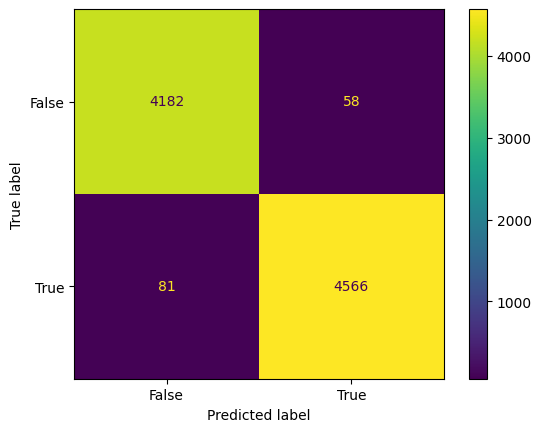

In [57]:
cm = metrics.confusion_matrix(y_test, model.predict(x_test)) 

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True]) 

cm_display.plot() 
plt.show() 

## Checking for accuracy

In [59]:
true_positives = cm[1, 1]
true_negatives = cm[0, 0]
total_population = cm.sum()

accuracy = (true_positives + true_negatives) / total_population

print(f'Accuracy: {accuracy}')

Accuracy: 0.984359176324969


# Export the model and vectorizer

In [58]:
import joblib
joblib.dump(model, 'model_lemmatization_svm.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer_svm_lemma.pkl')

['tfidf_vectorizer_svm_lemma.pkl']